In [1]:
import random
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [2]:
#df = pd.read_csv(r'C:\Users\Admin\Downloads\Revenue Benchmark - Sheet20 (2).csv')
# actual.loc[-1, 'timestamp per day'] = '2021-03-31'
# actual.loc[-2, 'timestamp per day'] = '2021-03-30'
# actual = pd.read_csv(r'C:\Users\Admin\Downloads\New Visualization - 2021-04-29T132509.546.csv')
# actual['Date'] = pd.to_datetime(actual['timestamp per day'])
# actual['Revenue'] = actual['Sum of euroPrice'].str.replace(',', '')
# actual = actual.drop(columns=['Sum of euroPrice', 'timestamp per day'])
# actual = actual.set_index(['Date'])
# actual['Revenue'] = pd.to_numeric(actual['Revenue'])

# y = pd.concat([y, actual])
# y.info()

df = pd.read_csv(r'C:\Users\Георгий\Projects\revenue_for_sarima.csv', usecols=[1,2], skiprows=1, names=['Date', 'Revenue'])


In [3]:
df

,Date,Revenue
0,2020-10-05,28348.879581
1,2020-10-06,31724.599510
2,2020-10-07,29435.249501
3,2020-10-08,25608.419529
4,2020-10-09,27823.869544
...,...,...
361,2021-10-01,65125.208803
362,2021-10-02,37878.139316
363,2021-10-03,33081.629420
364,2021-10-04,30580.919437


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df.set_index('Date')

In [6]:
y = df

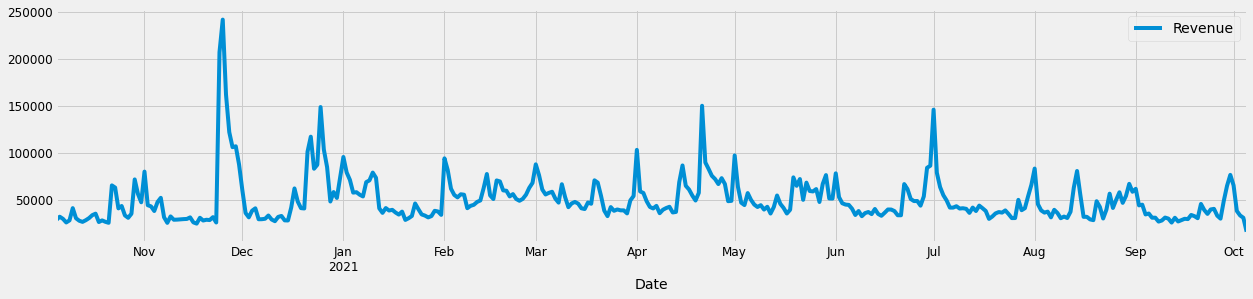

In [7]:
y.plot(figsize=(19, 4))
plt.show()

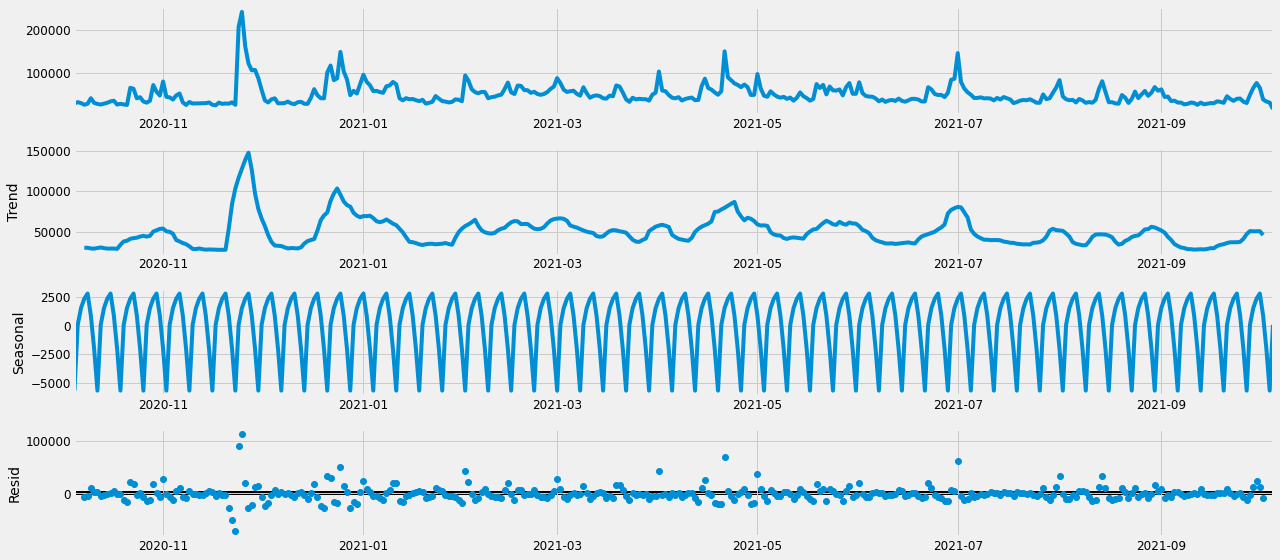

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Обозначение моделей SARIMA(p, d, q).(P,D,Q)m, Эти три параметра учитывают сезонность, тренд и шум в данных

In [9]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 31) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 31)
SARIMAX: (0, 0, 1) x (0, 1, 0, 31)
SARIMAX: (0, 1, 0) x (0, 1, 1, 31)
SARIMAX: (0, 1, 0) x (1, 0, 0, 31)


AIC(Akaike информационный критерий) является оценкой относительного качества статистический модели для данного набора данных. Учитывая коллекцию моделей для данных,AICоценивает качество каждой модели по отношению к каждой из других моделей. НизкийAICцените лучше. 

In [10]:
warnings.filterwarnings('default')
result_aic = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            mle_regression=True)
            results = mod.fit()
            
            
            row = {'param': param, 
                   'param_seasonal': param_seasonal,
                   'aic': results.aic
            }
            result_aic = result_aic.append(row, ignore_index=True)
            

        except: 
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
result_aic.sort_values(by = 'aic', ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aic,param,param_seasonal
23,6715.660714,"(0, 1, 0)","(1, 1, 1, 31)"
19,6724.125547,"(0, 1, 0)","(0, 1, 1, 31)"
63,6769.692513,"(1, 1, 1)","(1, 1, 1, 31)"
59,6770.016931,"(1, 1, 1)","(0, 1, 1, 31)"
47,6773.243726,"(1, 0, 1)","(1, 1, 1, 31)"
...,...,...,...
16,8195.861876,"(0, 1, 0)","(0, 0, 0, 31)"
48,8196.875525,"(1, 1, 0)","(0, 0, 0, 31)"
32,8208.796786,"(1, 0, 0)","(0, 0, 0, 31)"
8,8744.010743,"(0, 0, 1)","(0, 0, 0, 31)"


In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 31),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L31       0.1294      0.048      2.719      0.007       0.036       0.223
ma.S.L31      -0.9899      0.034    -29.360      0.000      -1.056      -0.924
sigma2      3.373e+08   2.72e-11   1.24e+19      0.000    3.37e+08    3.37e+08


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


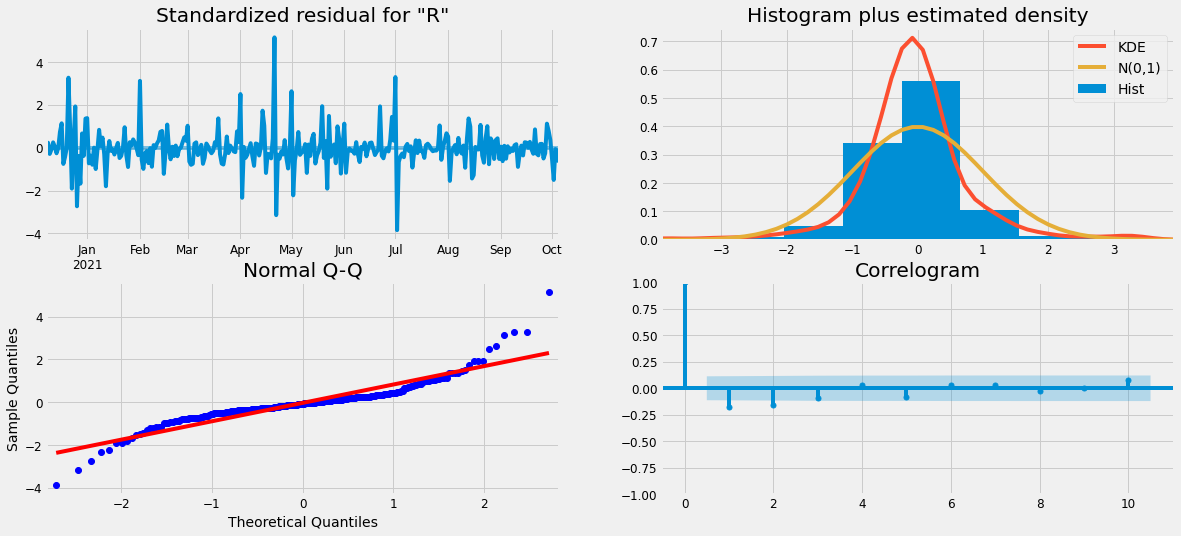

In [13]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


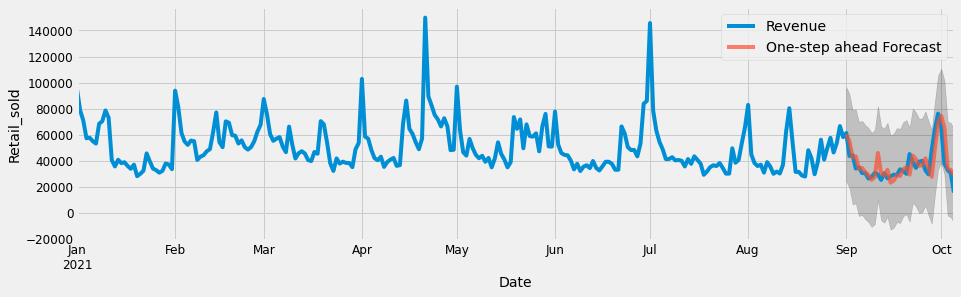

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2021-09-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-09-01':]
mse = y_forecasted.mean() - y_truth.mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(abs(mse)), 2)))

The Mean Squared Error is Revenue    1473.16
dtype: float64
The Root Mean Squared Error is Revenue    38.38
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


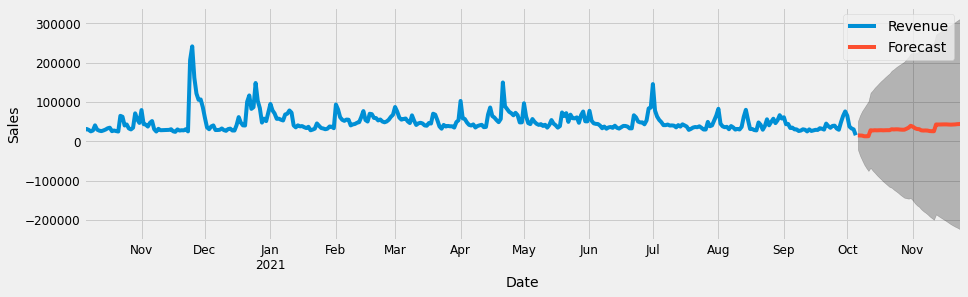

In [17]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


C:\Users\user01\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Date'>

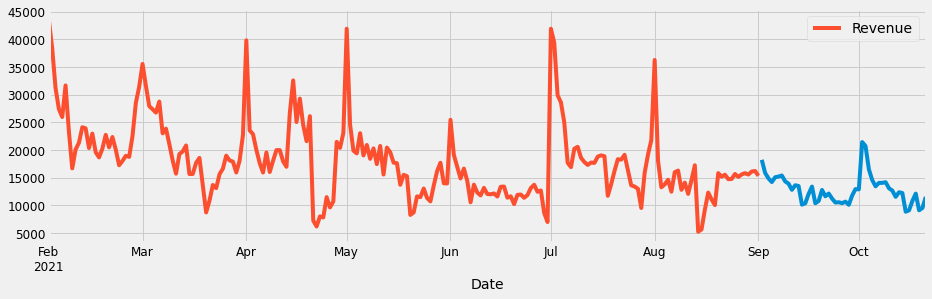

In [47]:
ax = pred_uc.predicted_mean.plot(label='observed', figsize=(14, 4))
y.plot(ax=ax, label='Actual Revenue')

In [18]:
pred_uc.conf_int()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lower Revenue,upper Revenue
2021-10-06,-20665.461456,51468.224240
2021-10-07,-35891.050996,66121.385620
2021-10-08,-47680.263131,77258.945433
2021-10-09,-58905.704774,85361.666620
2021-10-10,-67551.893030,93743.931655
2021-10-11,-75014.380839,101676.342385
2021-10-12,-66974.291278,123868.670889
2021-10-13,-74170.591379,129848.557397
2021-10-14,-79712.632317,136681.891472
2021-10-15,-85859.092439,142240.374426


In [49]:
pred_uc.predicted_mean

C:\Users\user01\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-09-02    18225.339130
2021-09-03    15864.983417
2021-09-04    14866.884746
2021-09-05    14209.200621
2021-09-06    15073.488684
2021-09-07    15201.234556
2021-09-08    15391.948474
2021-09-09    14326.850894
2021-09-10    13921.921563
2021-09-11    12799.156375
2021-09-12    13631.389430
2021-09-13    13497.484249
2021-09-14    10123.357324
2021-09-15    10374.911468
2021-09-16    12070.171356
2021-09-17    13391.589721
2021-09-18    10374.610335
2021-09-19    10800.197811
2021-09-20    12784.945562
2021-09-21    11637.119834
2021-09-22    12130.747958
2021-09-23    11229.228272
2021-09-24    10509.240480
2021-09-25    10565.160249
2021-09-26    10388.709087
2021-09-27    10675.570366
2021-09-28    10095.886377
2021-09-29    11764.173930
2021-09-30    12937.595134
2021-10-01    12895.399700
2021-10-02    21425.860347
2021-10-03    20705.108974
2021-10-04    16507.046359
2021-10-05    14571.515239
2021-10-06    13435.637559
2021-10-07    14055.994364
2021-10-08    14059.308492
2